# Financial Literacy Association's Stock Market Competitor Analysis

This is a dataset of all the competitors in UCI's Financial Literacy Association's (FLA) Stock Market Competition (SMC). First, we want to clean up the data and then analyze: 

1. trends in competitor demographics

2. success in reaching organization's goals

3. effectiveness in marketing strategies

Describe values in dataset # HERE

# Data Cleaning

In [1]:
# read csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

smc_data = pd.read_csv('/kaggle/input/smcdataclean/SMC Registration Form - Copy.csv')

In [2]:
# rename columns
smc_data = smc_data.rename(columns={'How Familiar Are You with the Stock Market and Investing?':'Investing Knowledge'})
smc_data = smc_data.rename(columns={'How did you hear about the competition?':'Marketing Impression'})

# drop NA values
smc_data = smc_data.dropna()

# drop duplicates
smc_data = smc_data.drop_duplicates()

# add columns for competition sign up year, month, day
smc_data['SignupYr'] = smc_data.Timestamp
smc_data['SignupMth'] = smc_data.Timestamp
smc_data['SignupDay'] = smc_data.Timestamp
smc_data['SignupYr'] = [int(i[0:4]) for i in smc_data['SignupYr']]
smc_data['SignupMth'] = [int(i[5:7]) for i in smc_data['SignupMth']]
smc_data['SignupDay'] = [int(i[8:11]) for i in smc_data['SignupDay']]

smc_data

,Timestamp,Email,Major,Year,Investing Knowledge,Marketing Impression,SignupYr,SignupMth,SignupDay
0,2022/09/26 6:34:02 PM MDT,Dylan10@uci.edu,Business,2,2,Flyer,2022,9,26
1,2022/09/26 6:55:11 PM MDT,keviny15@uci.edu,Business,1,4,Fairs,2022,9,26
2,2022/09/27 1:08:05 AM MDT,toann4@uci.edu,Engineering,2,2,FLA,2022,9,27
3,2022/09/27 2:39:06 PM MDT,Sdeng5@uci.edu,Undeclared,1,2,Instagram,2022,9,27
4,2022/09/27 2:40:43 PM MDT,isabelmn@uci.edu,Undeclared,1,2,Fairs,2022,9,27
...,...,...,...,...,...,...,...,...,...
88,2022/12/08 1:34:16 PM MST,khangnd1@uci.edu,Biology,3,1,Merage School,2022,12,8
89,2023/01/03 5:08:32 PM MST,jiajung2@uci.edu,Business,4,5,Internet,2023,1,3
90,2023/01/18 10:29:45 AM MST,zhenqih1@uci.edu,Business,3,5,Instagram,2023,1,18
91,2023/01/23 1:20:48 PM MST,Sushang1@uci.edu,CS,2,2,FLA,2023,1,23


# Data Analysis

Goals:
1. **Breakdown competitor demographics**
2. **Measure organization's goals**

    a. Target diverse pool of majors
    
    b. Target diverse pool of student years
    
    c. Target students new to investing
3. **Measure success of marketing strategies**

In [3]:
# dataset overview
smc_data.describe(include="all")

,Timestamp,Email,Major,Year,Investing Knowledge,Marketing Impression,SignupYr,SignupMth,SignupDay
count,93,93,93,93.000000,93.000000,93,93.000000,93.000000,93.000000
unique,93,93,6,NaN,NaN,8,NaN,NaN,NaN
top,2022/09/26 6:34:02 PM MDT,Dylan10@uci.edu,Business,NaN,NaN,Instagram,NaN,NaN,NaN
freq,1,1,57,NaN,NaN,31,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.483871,2.290323,NaN,2022.043011,9.559140,14.580645
std,NaN,NaN,NaN,1.028009,1.212083,NaN,0.203981,1.814569,9.342891
min,NaN,NaN,NaN,1.000000,1.000000,NaN,2022.000000,1.000000,2.000000
25%,NaN,NaN,NaN,2.000000,1.000000,NaN,2022.000000,10.000000,4.000000
50%,NaN,NaN,NaN,3.000000,2.000000,NaN,2022.000000,10.000000,17.000000
75%,NaN,NaN,NaN,3.000000,3.000000,NaN,2022.000000,10.000000,23.000000


**Students' Years in Stock Market Competition (SMC)**

Median 3.0


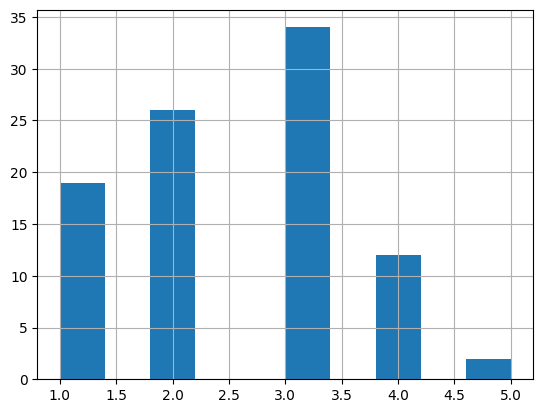

In [4]:
# breakdown of competitors years
smc_data.Year.hist()
median = smc_data.Year.median()
mean = smc_data.Year.mean()
print("Median", median)

The distribution of competitor years is slightly right skewed with a median of 3 (3rd year). The highest category is 3rd years, which can either be continuing students or transfer students.

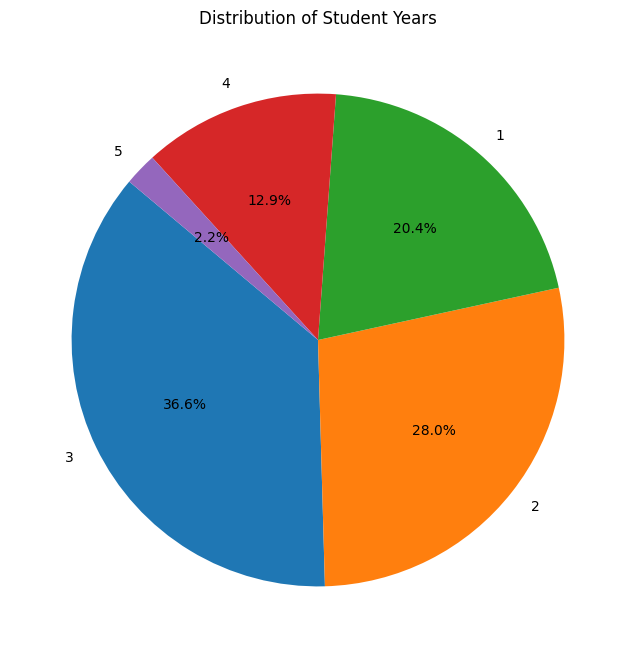

In [5]:
yr_counts = smc_data.Year.value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Student Years')
plt.pie(yr_counts, labels=yr_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

The overall composition of the competitors years leads with 3rd years being 36.6% of competitors and 2nd years being 28%. 2nd and 3rd years make up nearly 2/3 of competitors. As part of our goal, our organization wanted to have a diverse competitor pool, which we have accomplished with no category taking more than 50% of our competitor pool. However, organization should strive to grow number of 1st year participants to build long-lasting member retention from freshman year.

**Student's Investing Knowledge in Stock Market Competition (SMC)**

Median 2.0
Mean 2.2903225806451615


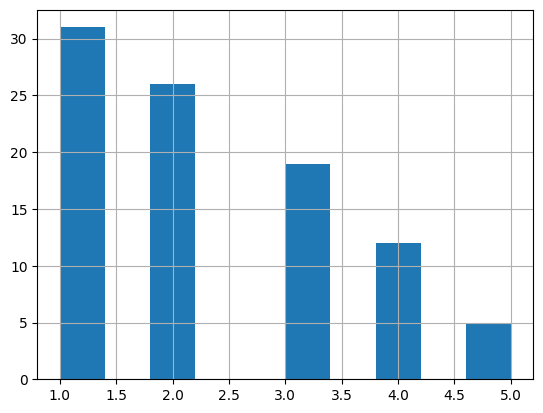

In [6]:
# breakdown of competitors investing knowledge
smc_data["Investing Knowledge"].hist()
median = smc_data["Investing Knowledge"].median()
mean = smc_data["Investing Knowledge"].mean()
print("Median", median)
print("Mean", mean)

The distribution of competitors investing knowledge is right skewed with a median of 2 (beginner). The highest category is 1 (novice) descending in frequency as investing knowledge increases. 

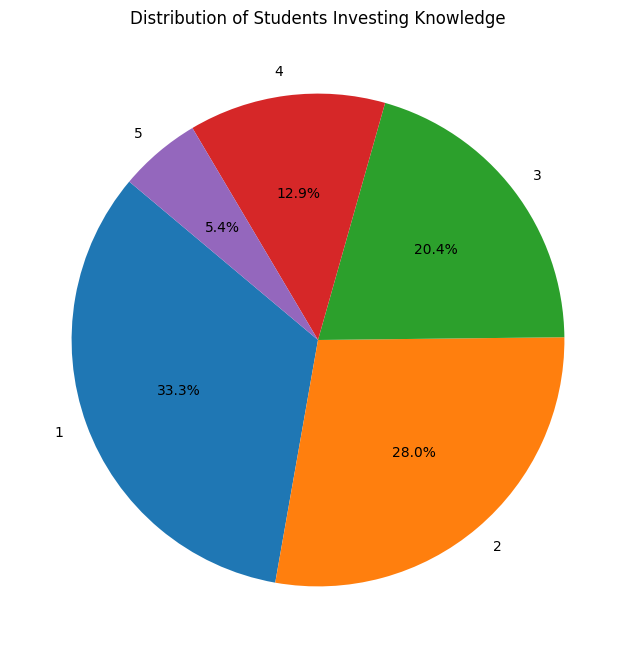

In [7]:
know_counts = smc_data["Investing Knowledge"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Students Investing Knowledge')
plt.pie(know_counts, labels=know_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

61% of competitors had an investing knowledge level of 1 and 2 (novice-beginner). So, our goal of reaching students with less investing  familiarity is acheived with more than half of participants being newer traders. 

**Competitors' Majors in Stock Market Competition (SMC)**

<Axes: >

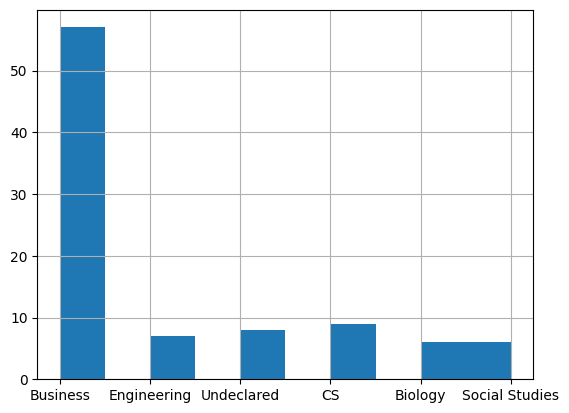

In [8]:
# breakdown of competitors major
smc_data.Major.hist()

Business related majors make up highest category of SMC competitor distribution being 61%

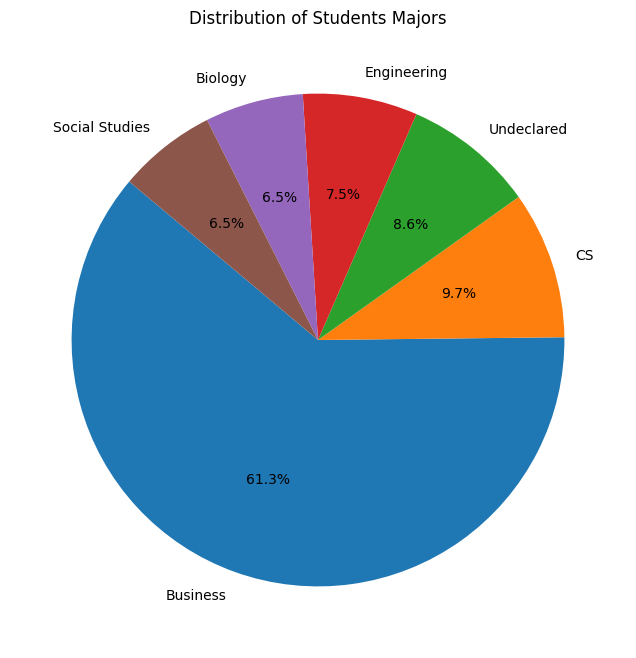

In [9]:
major_counts = smc_data["Major"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Students Majors')
plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Nearly 3/5 of competitors are Business related major, while the remaining 2/5 divide nearly equally into Computer Science, Undeclared, Engineering, Biology, and Social Studies majors. Overall, SMC competitors are mostly business majors, so organization's goal of having a diverse amount of majors requires further effort and FLA should focus on diversifying major composition of SMC competitors.

**Marketing Impressions on SMC Competitors**

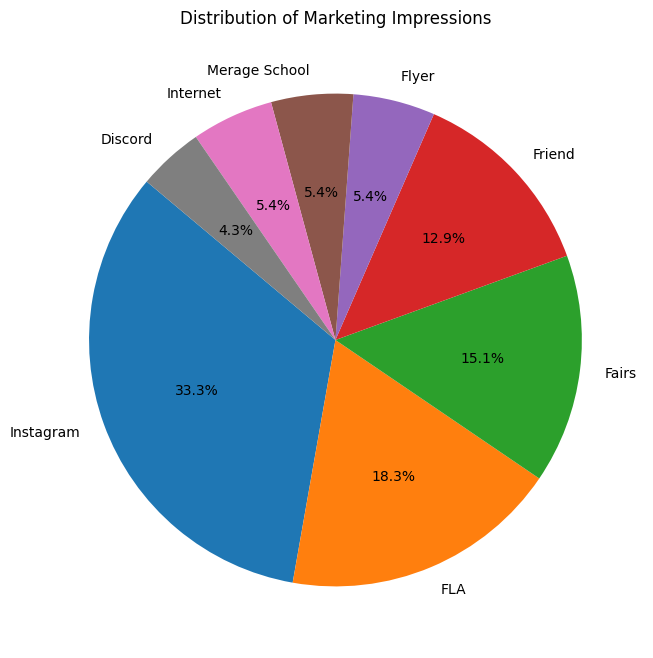

In [10]:
mkt_counts = smc_data["Marketing Impression"].value_counts()

plt.figure(figsize=(8, 8))
plt.title('Distribution of Marketing Impressions')
plt.pie(mkt_counts, labels=mkt_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

Majority of Marketing Impressions is through Instagram which is 1/3 of Outreach. Following Instagram is conversion from FLA members at (18%), then In-Person Boothing at Anteater Involvement Fair (AIF), Merage Undergraduate Student Association (MUSA) Fair (15%), and lastly Word of Mouth/Friends at 13%.

These results highlight our marketing campaign being successful in building a strong Instagram presence, promoting the competiton to FLA members, and impactful boothing. Other marketing platforms like Discord (4.3%), Flyer (5.4%), Facebook (0%) had low impact on attaining SMC competitors. It is recommended to prioritze Instagram, Boothing, and promoting FLA in future marketing efforts.

**SMC Competitor Signup Month Analysis**

Median 10.0


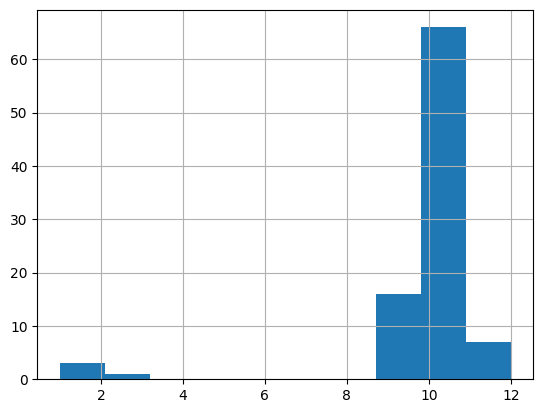

In [11]:
smc_data.SignupMth.hist()
print("Median", smc_data.SignupMth.median())

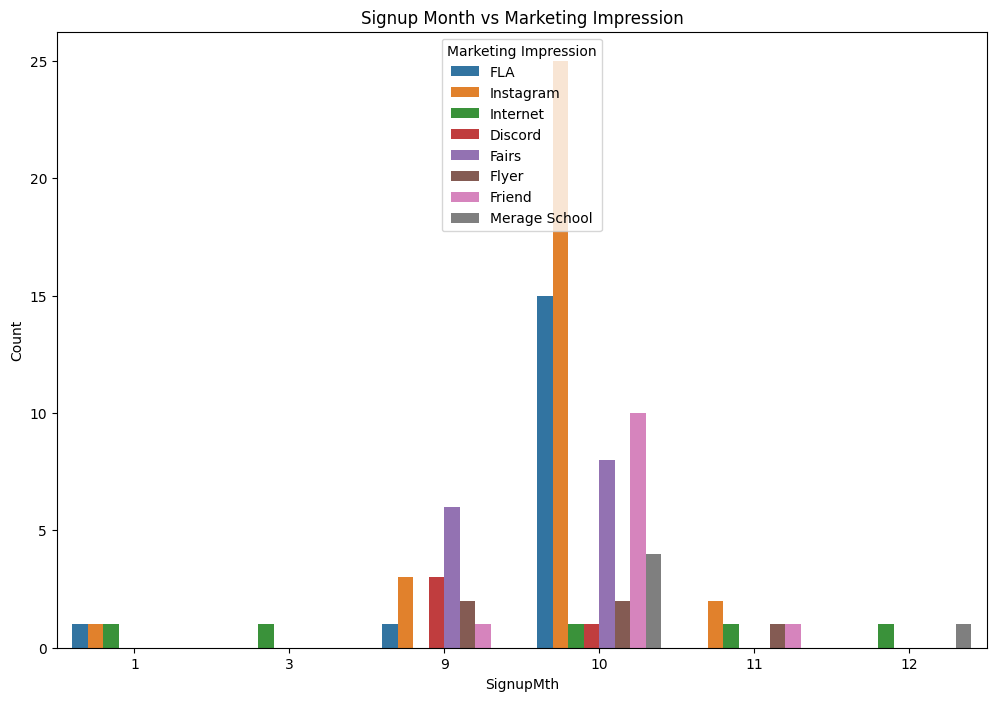

In [12]:
# breaking down marketing impressions by month

m_m = smc_data.groupby(by=["SignupMth", "Marketing Impression"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='SignupMth', y='Count', hue="Marketing Impression", data=m_m)
plt.title('Signup Month vs Marketing Impression')
plt.xlabel('SignupMth')
plt.ylabel('Count')
plt.legend(title='Marketing Impression')
plt.show()

Majority of signups for the competition is during Sept. (9) and Oct. (10). September marked Anteater Involvement Fair (AIF), club rush for incoming students. October marked start of Instagram campaign, FLA meetings, MUSA Involvement Fair (club rush for incoming business students). Additionally, during Sept. and Oct. we have the highest signups, thus higher impressions from friends. For future marketing efforts, organic efforts like social media, boothing, etc lead to an increase in inorganic marketing (friends).

**Correlations between Demographics**

**Major vs Investing Knowledge**

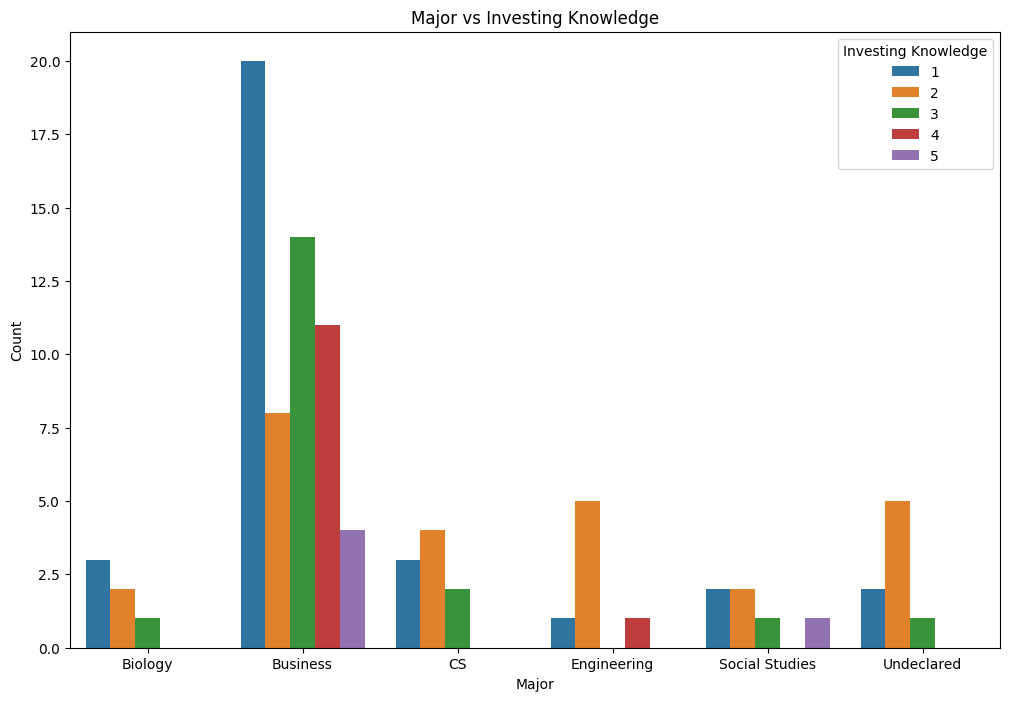

In [13]:
m_i = smc_data.groupby(by=["Major", "Investing Knowledge"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
plt.xlabel('Major')
plt.ylabel('Count')
plt.legend(title='Investing Knowledge')
sns.barplot(x='Major', y='Count', hue='Investing Knowledge', data=m_i)
plt.title('Major vs Investing Knowledge')
plt.show()

No clear trend in a specific major having more investing experience. Overall, most majors have a downwards trend in frequency of investing knowledge (novice -> expert). However, business-related majors had a higher frequency of (4-5) expert investing knowledge

**Major vs Year**

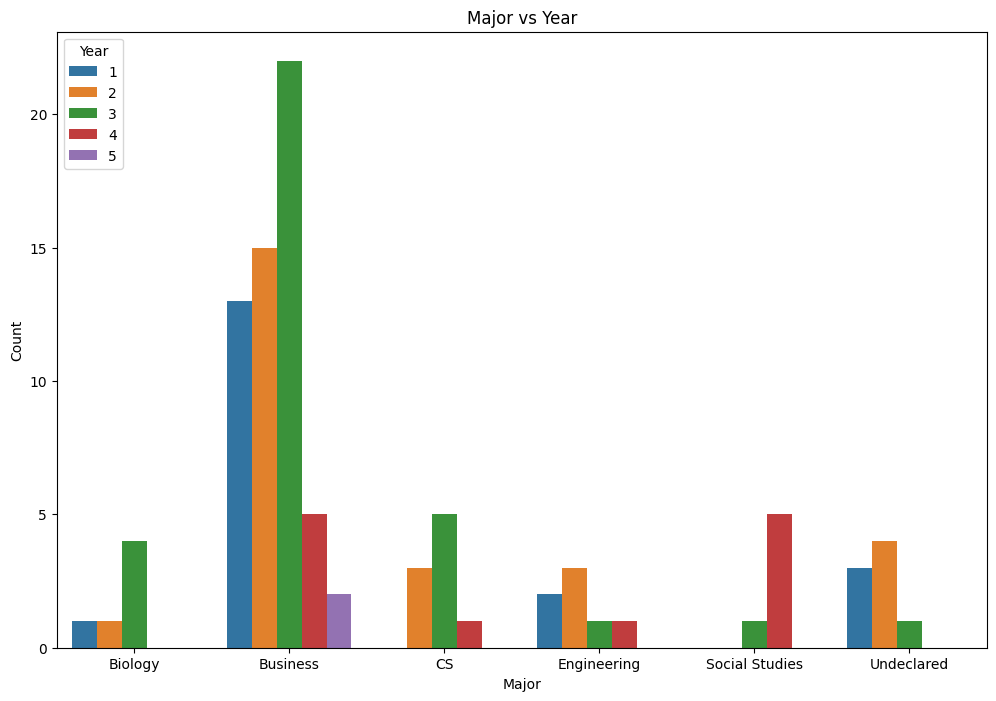

In [14]:
m_y = smc_data.groupby(by=["Major", "Year"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Major', y='Count', hue='Year', data=m_y)
plt.title('Major vs Year')
plt.xlabel('Major')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()

In this graph, we can see that Biology, Business, and CS have a highest frequency of 3rd years. Engineering and Undeclared have a highest of 2nd years. Lastly, Social Studies have majority seniors. In terms of the spread of student years for each major, Business has the most at 5 (Year 1-5) and Engineering at 4 (Year 1-4).

**Marketing Impression vs Major**

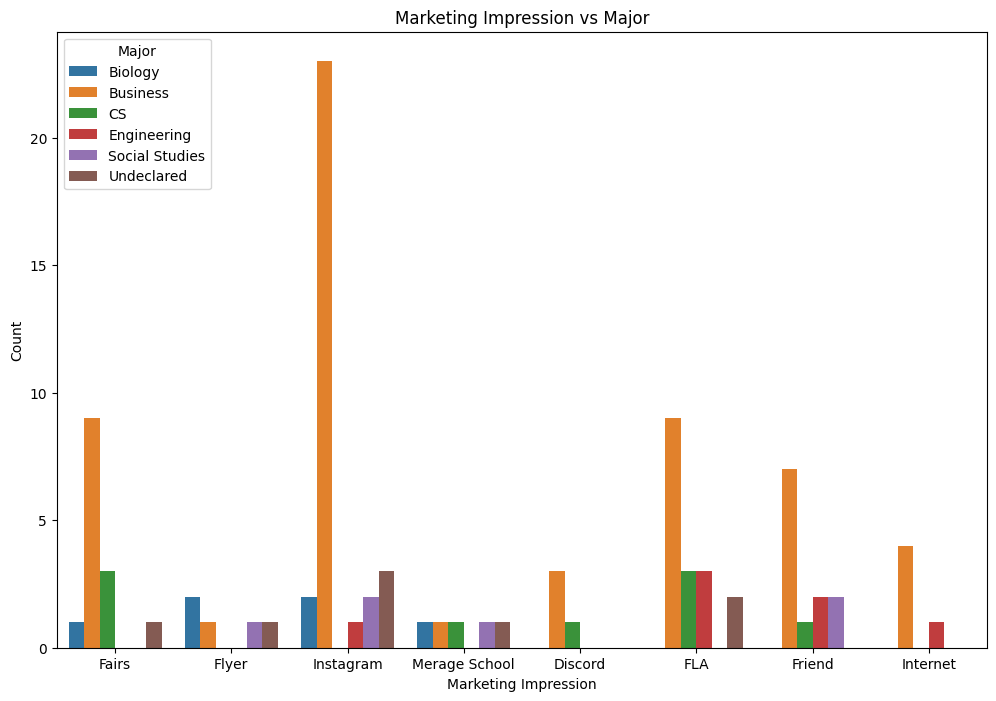

In [15]:
m_m = smc_data.groupby(by=["Major", "Marketing Impression"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Marketing Impression', y='Count', hue='Major', data=m_m)
plt.title('Marketing Impression vs Major')
plt.xlabel('Marketing Impression')
plt.ylabel('Count')
plt.legend(title='Major')
plt.show()

Instagram and Merage School reached widest number of majors. Most internet outreach were business majors. Overall, Fairs, Instagram, FLA reached mostly business majors. FLA and Fairs were highest drivers for Computer science. FLA is highest for Engineering.

**Investing Knowledge vs Year**

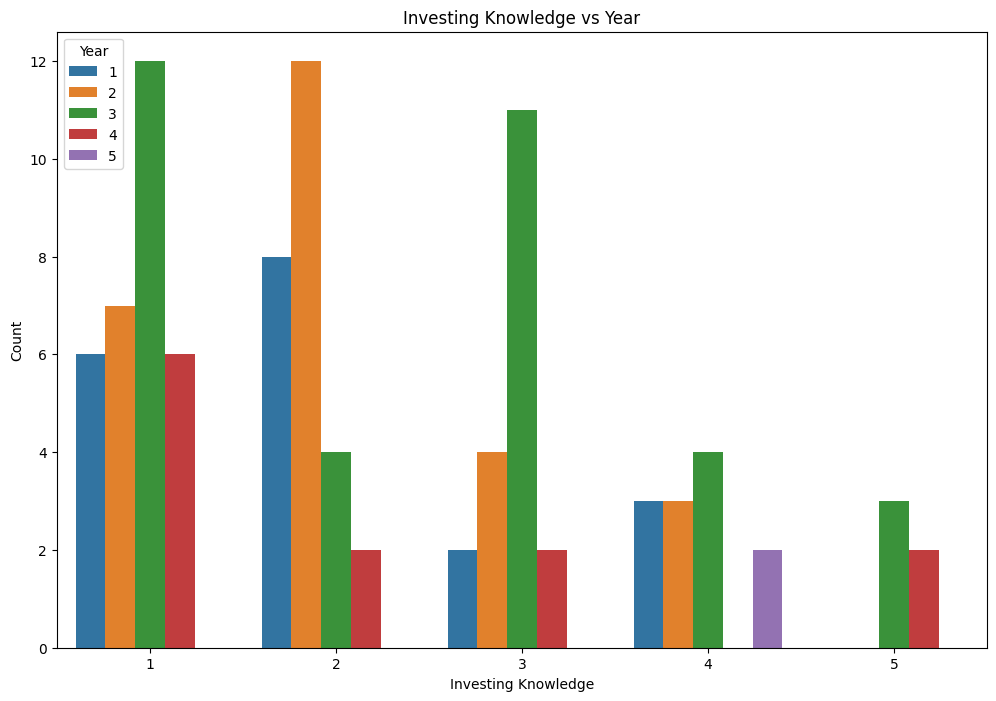

In [16]:
i_y = smc_data.groupby(by=["Investing Knowledge", "Year"]).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Investing Knowledge', y='Count', hue='Year', data=i_y)
plt.title('Investing Knowledge vs Year')
plt.xlabel('Investing Knowledge')
plt.ylabel('Count')
plt.legend(title='Year')
plt.show()

**Investing Knowledge vs Outreach**

In [17]:
# g = smc_data.groupby(by=["Investing Skill", "Outreach"]).size().reset_index(name='Count')
# # Bar Plot
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Investing Skill', y='Count', hue='Outreach', data=g)
# plt.title('Count of Students by Investing Skill and Outreach')
# plt.xlabel('Investing Skill')
# plt.ylabel('Count')
# plt.legend(title='Outreach')
# plt.show()

**Year vs Marketing Impressions**

In [18]:
# g = smc_data.groupby(by=["Outreach", "Year"]).size().reset_index(name='Count')
# # Bar Plot
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Year', y='Count', hue='Outreach', data=g)
# plt.title('Count of Students by Year and Outreach')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.legend(title='Outreach')
# plt.show()

# Summary:
1. **Breakdown competitor demographics**
2. **Measure organization's goals**

    a. Target diverse pool of majors
    
    b. Target diverse pool of student years
    
    c. Target students new to investing
3. **Measure success of marketing strategies**